In [1]:
import arviz as az
import numpy as np
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = np.load("npu_gaussian_1000000.npz")

In [3]:
response = data["R"]
observed = data["m"]
truth = data["t"]

In [4]:
truth

array([   37,   519,  4094, 15417, 29840, 29780, 15491,  4196,   587,
          39])

In [5]:
np.dot(truth, response)

array([  553.08560311,  2388.77281464,  7990.08543185, 17401.57603477,
       25396.24252609, 25396.4025777 , 17443.25101909,  8085.01420244,
        2521.76205862,   410.45627376])

In [6]:
observed

array([  226,  1368,  6165, 16187, 26017, 25923, 16029,  6340,  1488,
         219])

In [9]:
basic_model = pm.Model()

with basic_model:
    params = pm.DiscreteUniform(
        "params", 
        lower=truth // 10, 
        upper=truth * 10,
    )
    likelihood = pm.Poisson(
        "likelihood", mu=pm.math.dot(params, response),
        observed=observed,
    )
    trace = pm.sample(draws=50000, tune=10000)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [params]


Output()

Sampling 4 chains for 10_000 tune and 50_000 draw iterations (40_000 + 200_000 draws total) took 14 seconds.


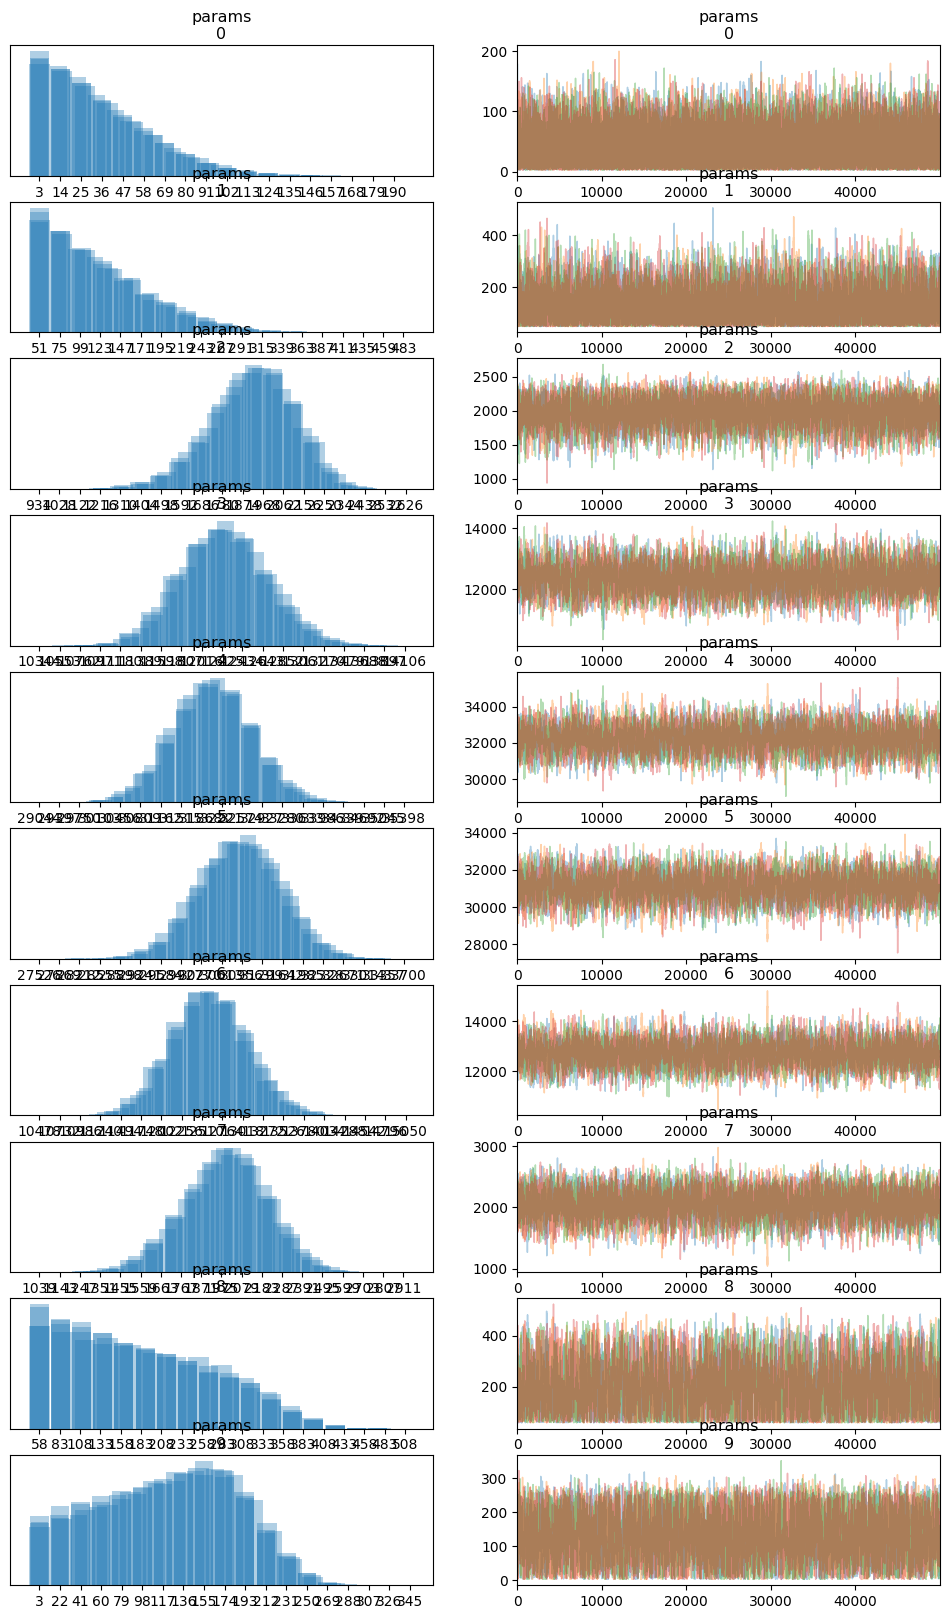

In [11]:
az.plot_trace(trace, compact=False);